In [1]:
import pandas as pd
import os

# Path to the folder containing your CSV files
folder_path = "results"  # Replace with your folder path

# List all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Combine all CSV files into one DataFrame
combined_data = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Save combined data to a new CSV for future reference
combined_data.to_csv("combined_results.csv", index=False)

print("Combined data shape:", combined_data.shape)

Combined data shape: (1330, 11)


In [10]:
results = [pd.read_csv(file) for file in csv_files]

In [14]:
results[1]

,Dataset Size,Known Datasets,Training Size,Eval Size,F1,P-value,TPR,FPR,AUC,Chunk-level AUC,Seed
0,10,1000,2000,2000,46.152024,-2.138634,80.8,78.9,0.482616,0.491925,670487
1,10,1000,2000,2000,38.041071,-9.451465,99.6,95.5,0.519494,0.502192,116739
2,10,1000,2000,2000,34.014565,-3.255068,99.6,99.3,0.456402,0.492048,26225
3,10,1000,2000,2000,46.172870,-4.405764,94.0,84.9,0.541328,0.510833,777572
4,10,1000,2000,2000,50.259452,-0.883482,75.4,69.8,0.526356,0.507500,288389
...,...,...,...,...,...,...,...,...,...,...,...
90,10,10,2000,2000,43.592336,-0.402145,92.4,87.3,0.515089,0.495467,670487
91,10,10,2000,2000,52.420018,-0.029357,48.4,43.4,0.532921,0.496621,116739
92,10,10,2000,2000,33.905096,-3.077356,99.6,99.4,0.456487,0.495341,26225
93,10,10,2000,2000,54.012647,-2.320175,56.9,48.8,0.532694,0.507698,777572


In [3]:
combined_data.sort_values(by='Dataset Size', inplace=True)

In [4]:
combined_data

,Dataset Size,Known Datasets,Training Size,Eval Size,F1,P-value,TPR,FPR,AUC,Chunk-level AUC,Seed
142,10,100,2000,2000,36.825799,-2.463513,98.1,96.3,0.482853,0.496294,26225
120,10,500,2000,2000,41.767308,-2.918904,93.0,89.6,0.486850,0.496048,670487
121,10,500,2000,2000,52.794987,-0.103646,60.4,54.3,0.530019,0.496656,116739
122,10,500,2000,2000,38.586017,-2.011719,96.1,94.0,0.450234,0.493868,26225
123,10,500,2000,2000,48.603711,-3.021457,87.0,78.7,0.545741,0.508816,777572
...,...,...,...,...,...,...,...,...,...,...,...
786,500,500,2000,2000,92.102566,-9.549369,99.9,15.6,0.918857,0.496656,116739
785,500,500,2000,2000,87.390410,-10.306231,98.8,23.7,0.841533,0.496048,670487
784,500,600,2000,2000,94.738624,-7.419057,99.4,9.9,0.965025,0.507834,288389
806,500,100,2000,2000,88.179148,-4.072305,92.4,16.0,0.911540,0.497346,116739


In [40]:
combined_data['P-value'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [42]:
# Aggregate data by Dataset Size
aggregated_data = combined_data.groupby('Dataset Size', as_index=False).mean()

# Preview the aggregated data
aggregated_data

,Dataset Size,Known Datasets,Training Size,Eval Size,F1,P-value,TPR,FPR,AUC,Chunk-level AUC,Seed
0,10,313.157895,2000.0,2000.0,45.992613,-2.143439,80.291579,74.929474,0.512915,0.5005,375882.4
1,20,313.157895,2000.0,2000.0,46.752835,-3.585842,83.941053,75.994737,0.522560,0.5005,375882.4
2,30,313.157895,2000.0,2000.0,47.550281,-3.958488,78.068421,68.044211,0.530824,0.5005,375882.4
3,40,313.157895,2000.0,2000.0,48.596074,-4.495855,85.930526,73.927368,0.537527,0.5005,375882.4
4,50,313.157895,2000.0,2000.0,49.238608,-5.615372,84.008421,69.974737,0.544884,0.5005,375882.4
5,60,313.157895,2000.0,2000.0,50.400017,-6.223120,86.677895,70.584211,0.551161,0.5005,375882.4
6,70,313.157895,2000.0,2000.0,51.789394,-6.130992,90.158947,71.984211,0.558305,0.5005,375882.4
7,80,313.157895,2000.0,2000.0,53.010393,-6.460301,85.792632,65.810526,0.564162,0.5005,375882.4
8,90,313.157895,2000.0,2000.0,54.090580,-6.706778,83.045263,61.341053,0.569209,0.5005,375882.4
9,100,313.157895,2000.0,2000.0,55.381741,-6.413965,85.132632,61.449474,0.575092,0.5005,375882.4


### 1. AUC vs. Dataset Size

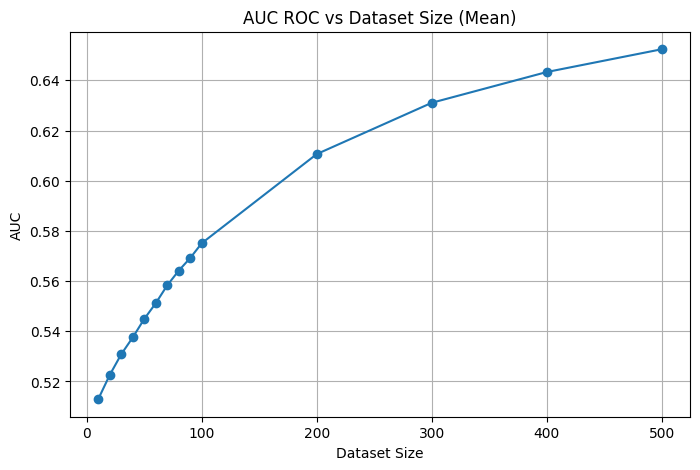

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot AUC vs Dataset Size
plt.figure(figsize=(8, 5))
plt.plot(aggregated_data['Dataset Size'], aggregated_data['AUC'], marker='o')
plt.xlabel('Dataset Size')
plt.ylabel('AUC')
plt.title('AUC ROC vs Dataset Size (Mean)')
plt.grid(True)
plt.show()

In [ ]:
aggregated_data2 = combined_data.groupby('Dataset Size').agg({'AUC': ['mean', 'std']}).reset_index()
aggregated_data2.columns = ['Dataset Size', 'AUC_mean', 'AUC_std']

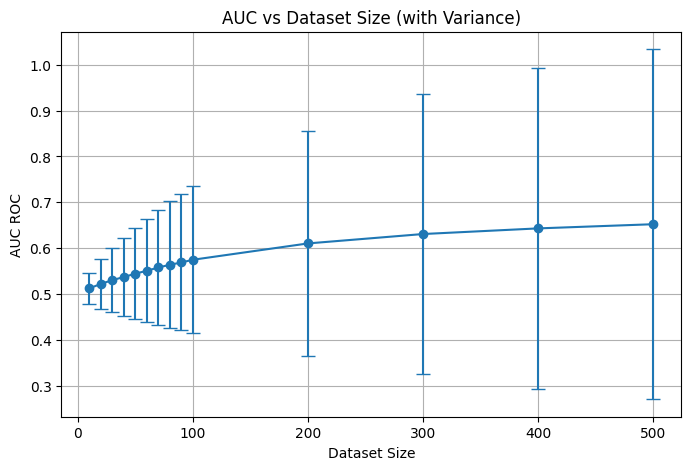

In [34]:
plt.figure(figsize=(8, 5))
plt.errorbar(aggregated_data2['Dataset Size'], aggregated_data2['AUC_mean'], yerr=aggregated_data2['AUC_std'], fmt='o-', capsize=5)
plt.xlabel('Dataset Size')
plt.ylabel('AUC ROC')
plt.title('AUC vs Dataset Size (with Variance)')
plt.grid(True)
plt.show()


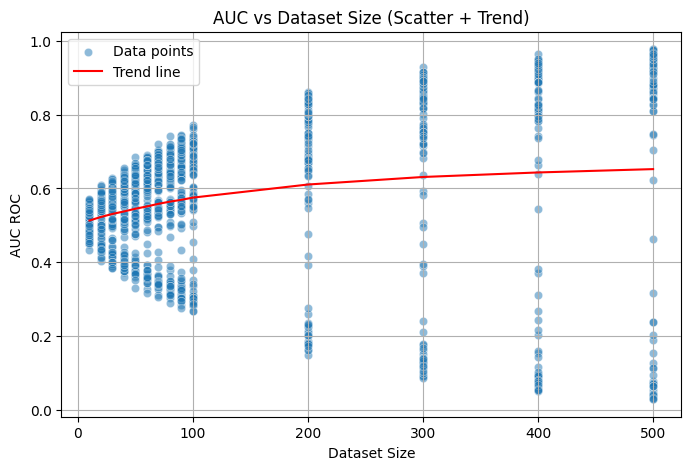

In [35]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Dataset Size', y='AUC', data=combined_data, alpha=0.5, label='Data points')
sns.lineplot(x='Dataset Size', y='AUC', data=aggregated_data, color='red', label='Trend line')
plt.xlabel('Dataset Size')
plt.ylabel('AUC ROC')
plt.title('AUC vs Dataset Size (Scatter + Trend)')
plt.legend()
plt.grid(True)
plt.show()

### Plot P-value vs Dataset Size

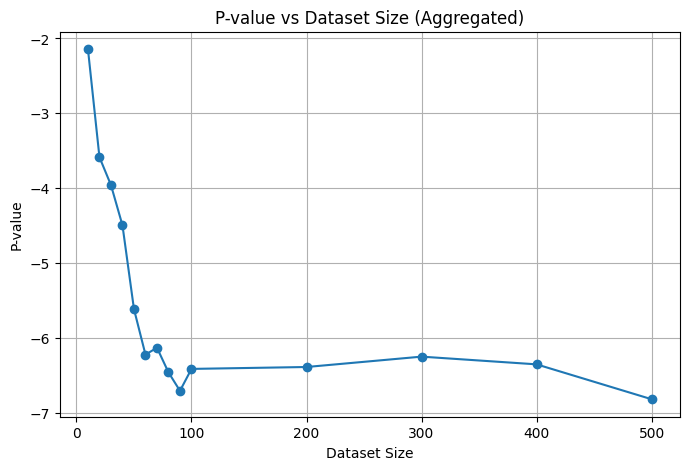

In [44]:
# Plot the aggregated data
plt.figure(figsize=(8, 5))
plt.plot(aggregated_data['Dataset Size'], aggregated_data['P-value'], marker='o')
plt.xlabel('Dataset Size')
plt.ylabel('P-value')
plt.title('P-value vs Dataset Size (Aggregated)')
# plt.yscale('log')  # Keep log scale for visibility
plt.grid(True)
plt.show()

### Plot F1-score vs Dataset Size

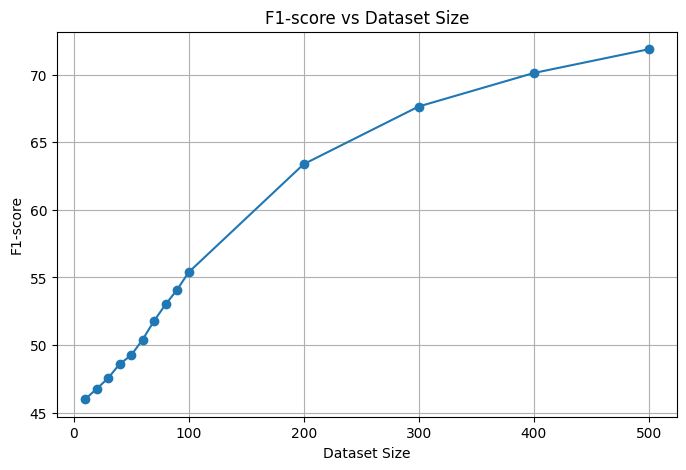

In [22]:
# Plot F1-score vs Dataset Size
plt.figure(figsize=(8, 5))
plt.plot(aggregated_data['Dataset Size'], aggregated_data['F1'], marker='o')
plt.xlabel('Dataset Size')
plt.ylabel('F1-score')
plt.title('F1-score vs Dataset Size')
plt.grid(True)
plt.show()

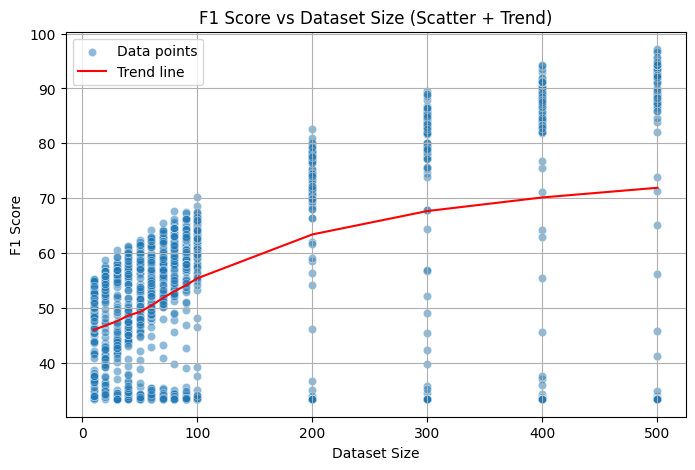

In [47]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Dataset Size', y='F1', data=combined_data, alpha=0.5, label='Data points')
sns.lineplot(x='Dataset Size', y='F1', data=aggregated_data, color='red', label='Trend line')
plt.xlabel('Dataset Size')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Dataset Size (Scatter + Trend)')
plt.legend()
plt.grid(True)
plt.show()

### Plot ROC Curve

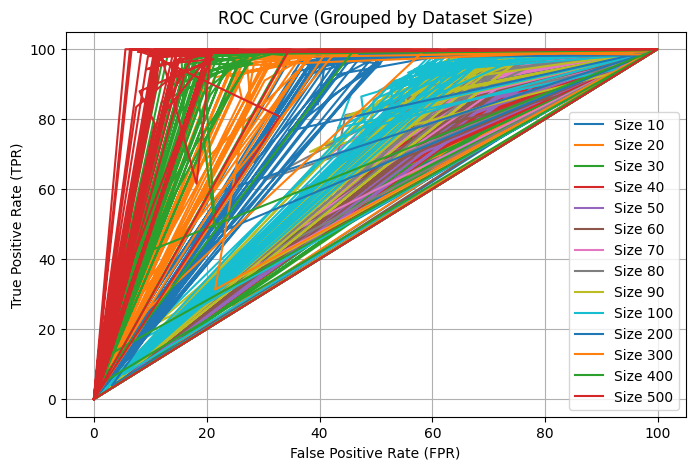

In [55]:
plt.figure(figsize=(8, 5))
unique_sizes = combined_data['Dataset Size'].unique()
for size in unique_sizes:
    subset = combined_data[combined_data['Dataset Size'] == size]
    plt.plot(subset['FPR'], subset['TPR'], label=f'Size {size}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Grouped by Dataset Size)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
filtered_data = combined_data[(combined_data['FPR'] >= 0) & (combined_data['FPR'] <= 100) &
                              (combined_data['TPR'] >= 0) & (combined_data['TPR'] <= 100)]

C:\Users\mmsz7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\mmsz7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_interpolate.py:710: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


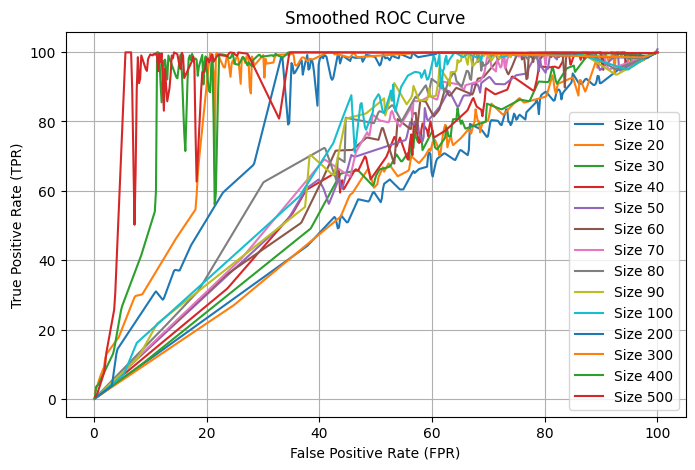

In [52]:
from scipy.interpolate import interp1d
import numpy as np

plt.figure(figsize=(8, 5))
for size in unique_sizes:
    subset = combined_data[combined_data['Dataset Size'] == size].sort_values('FPR')
    interp_fpr = np.linspace(0, 100, 500)
    interp_tpr = interp1d(subset['FPR'], subset['TPR'], kind='linear', fill_value="extrapolate")(interp_fpr)
    plt.plot(interp_fpr, interp_tpr, label=f'Size {size}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Smoothed ROC Curve')
plt.legend()
plt.grid(True)
plt.show()